<a href="https://colab.research.google.com/github/pranjalmankar2004/infosys_internship/blob/main/InfosysProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module 1: Data Collection and Understanding**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("/content/HomeC_augmented.csv")
df.head()

,Unnamed: 0,time,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,...,use_HO,gen_Sol,Car charger [kW],Water heater [kW],Air conditioning [kW],Home Theater [kW],Outdoor lights [kW],microwave [kW],Laundry [kW],Pool Pump [kW]
0,0,2016-01-01 05:00:00,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,...,0.932833,0.003483,0.013034,0.000241,0.013796,0.000519,0.0014,0.020147,0.000000,0.000746
1,1,2016-01-01 05:01:00,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,...,0.934333,0.003467,0.021769,0.000978,0.014487,0.000543,0.0008,0.030903,0.000000,0.002249
2,2,2016-01-01 05:02:00,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,...,0.931817,0.003467,0.028218,0.000642,0.014498,0.000481,0.0012,0.000000,0.001883,0.003971
3,3,2016-01-01 05:03:00,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,...,1.022050,0.003483,0.036478,0.000218,0.014181,0.000531,0.0016,0.024038,0.002610,0.003673
4,4,2016-01-01 05:04:00,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,...,1.139400,0.003467,0.044295,0.000844,0.014949,0.001052,0.0020,0.000000,0.002462,0.005006


# **Load Dataset**

In [23]:
df = pd.read_csv("HomeC_augmented.csv")
print(df.head())
print(df.shape)

   Unnamed: 0                 time  Dishwasher  Home office    Fridge  \
0           0  2016-01-01 05:00:00    0.000033     0.442633  0.124150   
1           1  2016-01-01 05:01:00    0.000000     0.444067  0.124000   
2           2  2016-01-01 05:02:00    0.000017     0.446067  0.123533   
3           3  2016-01-01 05:03:00    0.000017     0.446583  0.123133   
4           4  2016-01-01 05:04:00    0.000133     0.446533  0.122850   

   Wine cellar  Garage door      Barn      Well  Microwave  ...    use_HO  \
0     0.006983     0.013083  0.031350  0.001017   0.004067  ...  0.932833   
1     0.006983     0.013117  0.031500  0.001017   0.004067  ...  0.934333   
2     0.006983     0.013083  0.031517  0.001000   0.004067  ...  0.931817   
3     0.006983     0.013000  0.031500  0.001017   0.004067  ...  1.022050   
4     0.006850     0.012783  0.031500  0.001017   0.004067  ...  1.139400   

    gen_Sol  Car charger [kW]  Water heater [kW]  Air conditioning [kW]  \
0  0.003483          0.

Fix Timestamp Column (“time”)

In [24]:
df['time'] = pd.to_datetime(df['time'], format="%Y-%m-%d %H:%M:%S")
df = df.sort_values('time')

Set Time as Index (required for time series)

In [25]:
df = df.set_index('time')

Check Missing Values

In [26]:
print(df.isnull().sum())

Unnamed: 0               0
Dishwasher               0
Home office              0
Fridge                   0
Wine cellar              0
Garage door              0
Barn                     0
Well                     0
Microwave                0
Living room              0
temperature              0
humidity                 0
visibility               0
apparentTemperature      0
pressure                 0
windSpeed                0
cloudCover               0
windBearing              0
precipIntensity          0
dewPoint                 0
precipProbability        0
Furnace                  0
Kitchen                  0
year                     0
month                    0
day                      0
weekday                  0
weekofyear               0
hour                     0
minute                   0
timing                   0
use_HO                   0
gen_Sol                  0
Car charger [kW]         0
Water heater [kW]        0
Air conditioning [kW]    0
Home Theater [kW]        0
O

In [27]:
df = df.interpolate(method='time')
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

/tmp/ipython-input-1295565454.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method='time')
/tmp/ipython-input-1295565454.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')
/tmp/ipython-input-1295565454.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [28]:
df = df[~df.index.duplicated(keep='first')]

Resample to Hourly Data

In [29]:
df_hourly = df.resample('1H').mean(numeric_only=True)
df_hourly.head()

/tmp/ipython-input-2518426475.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('1H').mean(numeric_only=True)


,Unnamed: 0,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,...,use_HO,gen_Sol,Car charger [kW],Water heater [kW],Air conditioning [kW],Home Theater [kW],Outdoor lights [kW],microwave [kW],Laundry [kW],Pool Pump [kW]
time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,29.5,0.000064,0.241814,0.037861,0.063351,0.013046,0.038881,0.001042,0.021652,0.001505,...,1.044130,0.003307,0.232045,0.027864,0.014520,0.004471,0.011800,0.120953,0.011715,0.025323
2016-01-01 06:00:00,89.5,0.000099,0.043294,0.075522,0.112942,0.012836,0.039181,0.001021,0.004216,0.001618,...,0.918167,0.003422,0.676020,0.106347,0.014299,0.011702,0.034620,0.411554,0.027082,0.064480
2016-01-01 07:00:00,149.5,0.000043,0.043416,0.059486,0.007184,0.013299,0.034439,0.001014,0.004246,0.001629,...,0.714736,0.003448,1.052462,0.127955,0.014002,0.012473,0.053633,1.525886,0.027375,0.096394
2016-01-01 08:00:00,209.5,0.000138,0.065014,0.060412,0.007045,0.012925,0.034195,0.001016,0.004274,0.001634,...,0.960013,0.003447,1.354745,0.125544,0.013986,0.013061,0.070470,0.302304,0.033354,0.131010
2016-01-01 09:00:00,269.5,0.000060,0.043392,0.035106,0.007143,0.013220,0.031830,0.001014,0.004258,0.001650,...,0.639836,0.003439,1.546200,0.059802,0.014145,0.014597,0.084257,0.072612,0.062879,0.175744


Extract Device Columns for EDA

In [30]:
device_cols = [
    col for col in df.columns
    if ("kW" in col.lower())
    or col in ["Dishwasher","Home office","Fridge","Wine cellar",
               "Garage door","Barn","Well","Microwave","Living room",
               "Furnace","Kitchen"]
]

Overall Energy Trend (sum of all appliances)

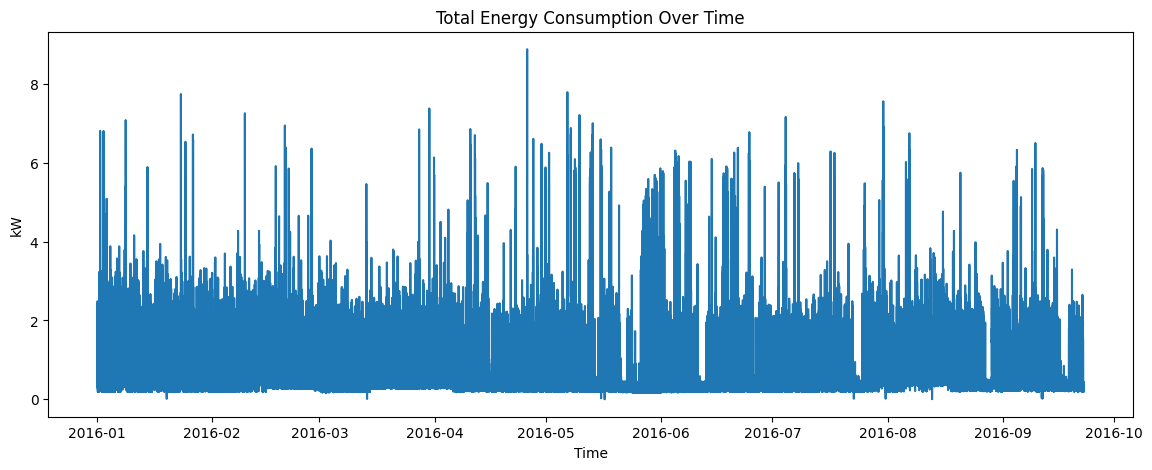

In [31]:
df['total_energy'] = df[device_cols].sum(axis=1)

plt.figure(figsize=(14,5))
plt.plot(df['total_energy'])
plt.title("Total Energy Consumption Over Time")
plt.xlabel("Time")
plt.ylabel("kW")
plt.show()

Device-wise Average Usage

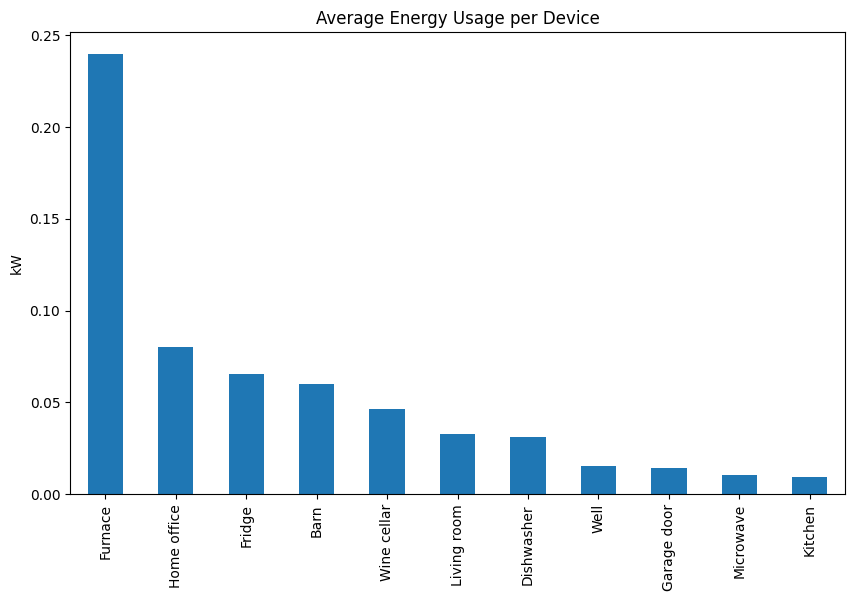

In [32]:
avg_usage = df[device_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
avg_usage.plot(kind='bar')
plt.title("Average Energy Usage per Device")
plt.ylabel("kW")
plt.show()

Heatmap of Device Correlations

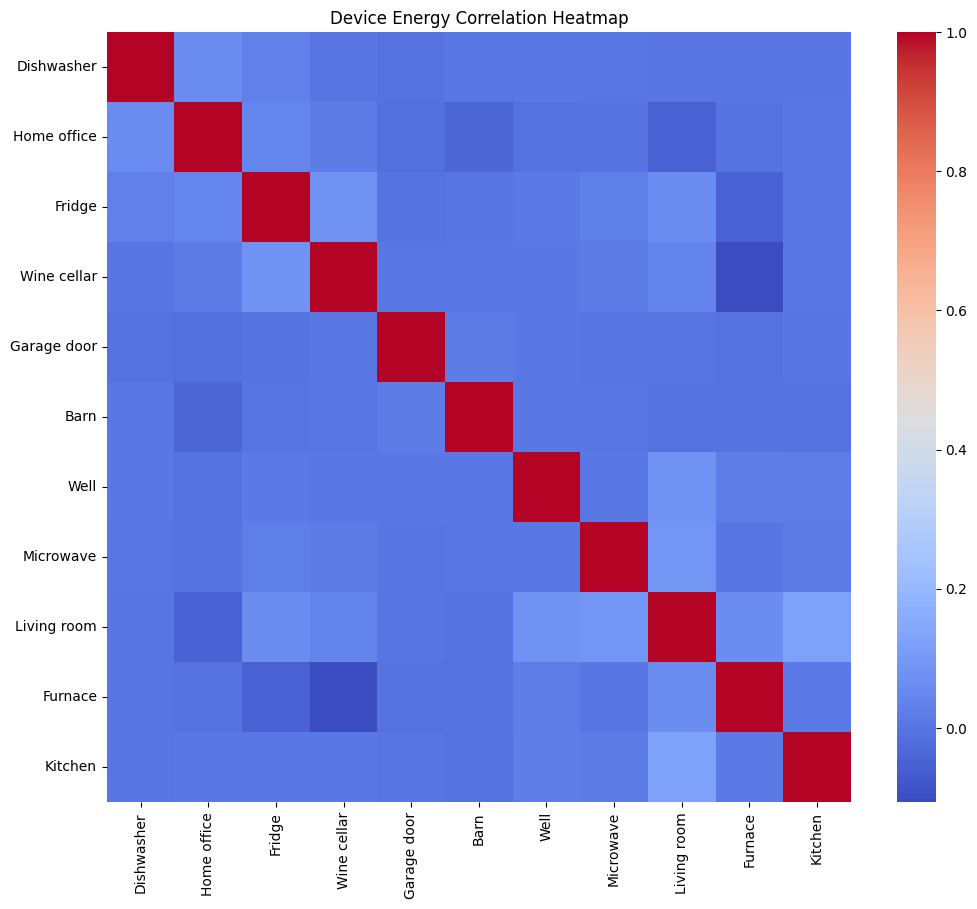

In [33]:
plt.figure(figsize=(12,10))
sns.heatmap(df[device_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Device Energy Correlation Heatmap")
plt.show()

Daily Trend

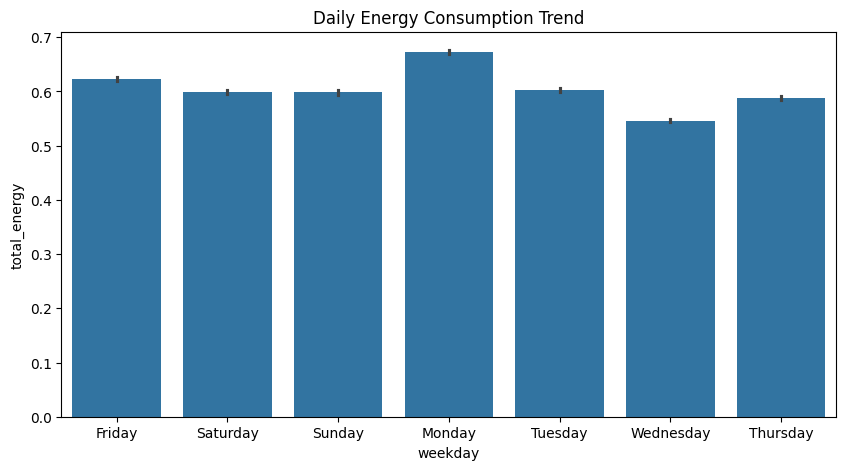

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(x="weekday", y="total_energy", data=df.reset_index())
plt.title("Daily Energy Consumption Trend")
plt.show()

Hourly Trend

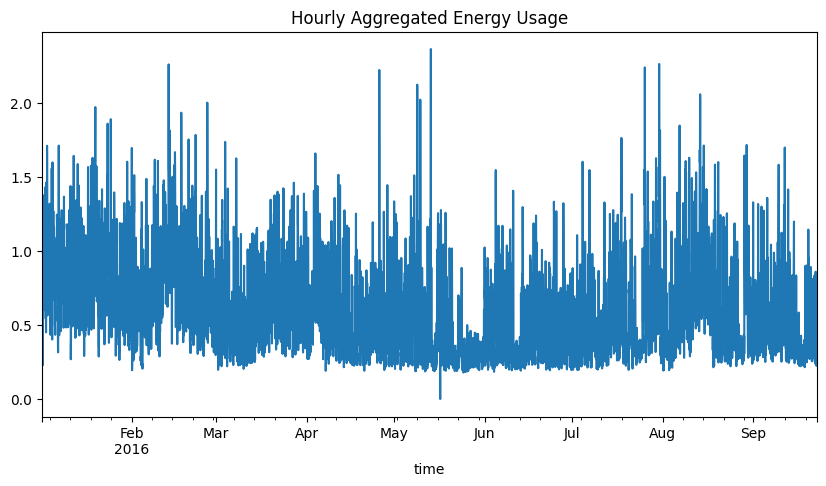

In [35]:
df_hourly['total_energy'] = df_hourly[device_cols].sum(axis=1)
plt.figure(figsize=(10,5))
df_hourly['total_energy'].plot()
plt.title("Hourly Aggregated Energy Usage")
plt.show()

Save Cleaned Dataset

In [36]:
df.to_csv("cleaned_HomeC_dataset.csv")
df_hourly.to_csv("hourly_HomeC_dataset.csv")

# **Module 2: Data Cleaning and Preprocessing**

In [37]:
#Import Required Libraries
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [38]:
import pandas as pd
df = pd.read_csv("/content/HomeC_augmented.csv")
print(df.head())
print(df.shape)

   Unnamed: 0                 time  Dishwasher  Home office    Fridge  \
0           0  2016-01-01 05:00:00    0.000033     0.442633  0.124150   
1           1  2016-01-01 05:01:00    0.000000     0.444067  0.124000   
2           2  2016-01-01 05:02:00    0.000017     0.446067  0.123533   
3           3  2016-01-01 05:03:00    0.000017     0.446583  0.123133   
4           4  2016-01-01 05:04:00    0.000133     0.446533  0.122850   

   Wine cellar  Garage door      Barn      Well  Microwave  ...    use_HO  \
0     0.006983     0.013083  0.031350  0.001017   0.004067  ...  0.932833   
1     0.006983     0.013117  0.031500  0.001017   0.004067  ...  0.934333   
2     0.006983     0.013083  0.031517  0.001000   0.004067  ...  0.931817   
3     0.006983     0.013000  0.031500  0.001017   0.004067  ...  1.022050   
4     0.006850     0.012783  0.031500  0.001017   0.004067  ...  1.139400   

    gen_Sol  Car charger [kW]  Water heater [kW]  Air conditioning [kW]  \
0  0.003483          0.

In [39]:
# Convert Timestamp to Datetime Format
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df = df.sort_values('time')
df.set_index('time', inplace=True)

In [40]:
# Check missing values
print(df.isnull().sum())

Unnamed: 0               0
Dishwasher               0
Home office              0
Fridge                   0
Wine cellar              0
Garage door              0
Barn                     0
Well                     0
Microwave                0
Living room              0
temperature              0
humidity                 0
visibility               0
apparentTemperature      0
pressure                 0
windSpeed                0
cloudCover               0
windBearing              0
precipIntensity          0
dewPoint                 0
precipProbability        0
Furnace                  0
Kitchen                  0
year                     0
month                    0
day                      0
weekday                  0
weekofyear               0
hour                     0
minute                   0
timing                   0
use_HO                   0
gen_Sol                  0
Car charger [kW]         0
Water heater [kW]        0
Air conditioning [kW]    0
Home Theater [kW]        0
O

In [ ]:
# Fill missing values using time-based interpolation
# Remove rows with NaT in the index before interpolation
df = df[df.index.notna()]
df = df.infer_objects(copy=False).interpolate(method='time')
df = df.bfill()
df = df.ffill()

/tmp/ipython-input-1518312161.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.infer_objects(copy=False).interpolate(method='time')


Handle Outliers (IQR Method)

In [ ]:
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

columns_for_iqr = Q1.index

outlier_mask = ((df[columns_for_iqr] < (Q1 - 1.5 * IQR)) |
                (df[columns_for_iqr] > (Q3 + 1.5 * IQR))).any(axis=1)

df = df[~outlier_mask]

Resample Data

In [ ]:
df_hourly = df.resample('h').mean(numeric_only=True)
df_daily = df.resample('D').mean(numeric_only=True)

Normalize / Scale Energy Values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_values = scaler.fit_transform(df_hourly)
df_scaled = pd.DataFrame(
    scaled_values,
    columns=df_hourly.columns,
    index=df_hourly.index
)

Train–Validation–Test Split

In [ ]:
train_size = int(len(df_scaled) * 0.7)
val_size = int(len(df_scaled) * 0.15)

train = df_scaled[:train_size]
val = df_scaled[train_size:train_size + val_size]
test = df_scaled[train_size + val_size:]

print("Train:", train.shape)
print("Validation:", val.shape)
print("Test:", test.shape)

Train: (85, 39)
Validation: (18, 39)
Test: (19, 39)


# **Module 3**

In [3]:
import pandas as pd
df = pd.read_csv("/content/HomeC_augmented.csv")
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values('time')
df.set_index('time', inplace=True)

Extract Time-Based Features

In [4]:
# These features help models learn usage patterns by time
df['hour'] = df.index.hour
df['day'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['week'] = df.index.isocalendar().week

Aggregate Device-Level Consumption

In [5]:
df['total_energy'] = df.sum(axis=1, numeric_only=True)
df['avg_energy'] = df.mean(axis=1, numeric_only=True)

Create Lag Features (Time-Series Dependency)

In [6]:
# It helps model learn previous usage impact
df['lag_1'] = df['total_energy'].shift(1)
df['lag_24'] = df['total_energy'].shift(24)

Create Moving Average Features

In [7]:
# Smooths short-term fluctuations
df['rolling_mean_3'] = df['total_energy'].rolling(window=3).mean()
df['rolling_mean_24'] = df['total_energy'].rolling(window=24).mean()

Drop Rows with NaN (Created Due to Lag)

In [8]:
df = df.dropna()

Prepare Final Feature Set for ML

In [9]:
# Input Features (X)
X = df[['hour', 'day', 'day_of_week', 'month',
        'avg_energy', 'lag_1', 'lag_24',
        'rolling_mean_3', 'rolling_mean_24']]
# Target Variable (y)
y = df['total_energy']

In [10]:
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (43632, 9)
Target shape: (43632,)


In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

# Convert regression target to classification (High / Low energy)
y_class = np.where(y > y.mean(), 1, 0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_class, test_size=0.2, shuffle=False
)

# Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Classification model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Prediction
y_pred = model.predict(X_test_scaled)

# Evaluation metrics
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Precision: 1.0
Recall: 1.0
F1 Score: 1.0


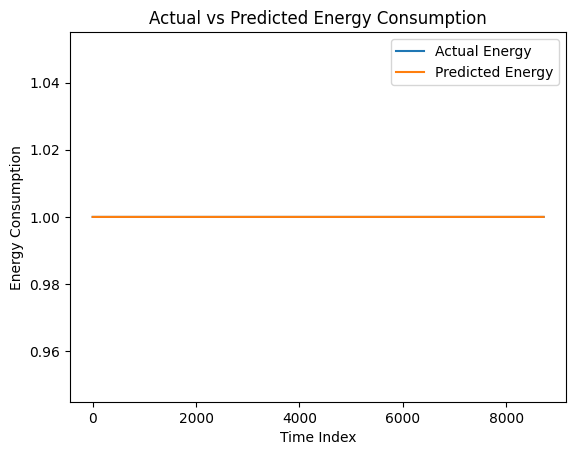

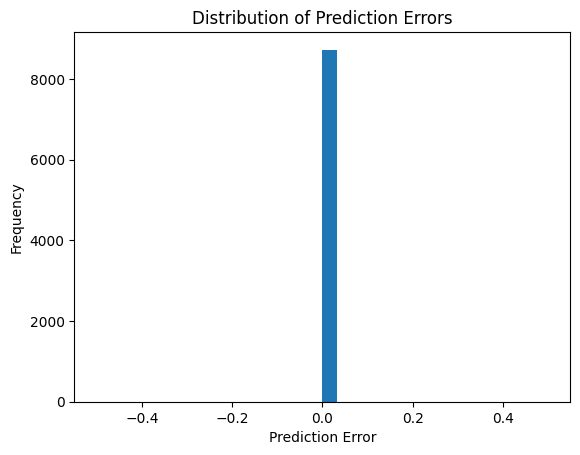

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Shows effect of all engineered features together
plt.figure()
plt.plot(y_test, label="Actual Energy")
plt.plot(y_pred, label="Predicted Energy")
plt.xlabel("Time Index")
plt.ylabel("Energy Consumption")
plt.title("Actual vs Predicted Energy Consumption")
plt.legend()
plt.show()

# Shows stability and learning from engineered features
residuals = y_test - y_pred

plt.figure()
plt.hist(residuals, bins=30)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()

# **Module 4: Baseline Model Development **

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X = df[['hour', 'day', 'day_of_week', 'month',
        'avg_energy', 'lag_1', 'lag_24',
        'rolling_mean_3', 'rolling_mean_24']]

y = df['total_energy']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 6.8199075609052854e-12
MSE: 7.439564043433267e-23
R2 Score: 1.0


# **Module 5: LSTM Model Development**

In [20]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
# Use total_energy for LSTM forecasting
data = df[['total_energy']].values

# Scale data
scaler_lstm = MinMaxScaler()
data_scaled = scaler_lstm.fit_transform(data)

def create_sequences(data, time_steps=24):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

TIME_STEPS = 24
X_lstm, y_lstm = create_sequences(data_scaled, TIME_STEPS)
split = int(0.8 * len(X_lstm))
X_train, X_test = X_lstm[:split], X_lstm[split:]
y_train, y_test = y_lstm[:split], y_lstm[split:]

model_lstm = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model_lstm.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=30,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

y_pred_lstm = model_lstm.predict(X_test)

# Inverse scaling
y_test_inv = scaler_lstm.inverse_transform(y_test)
y_pred_inv = scaler_lstm.inverse_transform(y_pred_lstm)

print("LSTM MAE:", mean_absolute_error(y_test_inv, y_pred_inv))
print("LSTM MSE:", mean_squared_error(y_test_inv, y_pred_inv))

model_lstm.save("lstm_energy_model.h5")

Epoch 1/30
982/982 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - loss: 0.0044 - val_loss: 3.2881e-05
Epoch 2/30
982/982 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - loss: 2.9979e-06 - val_loss: 2.7504e-05
Epoch 3/30
982/982 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - loss: 1.9896e-06 - val_loss: 4.7357e-05
Epoch 4/30
982/982 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - loss: 1.1888e-06 - val_loss: 2.1760e-06
Epoch 5/30
982/982 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - loss: 3.3731e-06 - val_loss: 1.7100e-05
Epoch 6/30
982/982 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - loss: 5.1329e-06 - val_loss: 5.5718e-06
Epoch 7/30
982/982 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - loss: 2.8816e-06 - val_loss: 5.8520e-07
Epoch 8/30
982/982 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - loss: 4.4906e-06 - val_loss: 9.7562e-07
Epoch 9/30
982/982 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - loss: 3.1746e-06 - val_loss: 6.3374e-07
Epoch 10/30
982/982 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - loss: 7.3409e-07 - val_loss: 1.6151e-05
Epoch 11/30
982/982 ━━━━━━━━━━━━━━━━━━━━ 20

LSTM MAE: 46.12600501311026
LSTM MSE: 2848.37319470941
